![start](NCIA_Images\start.png)

# Ensemble Learning

**Conceito Principal**: Combinar múltiplos modelos para obter melhor performance que qualquer modelo individual.

## Técnicas que estudaremos:

1. **Voting** - Diferentes algoritmos "votam" na resposta final
2. **Bagging** - Mesmo algoritmo treinado em subconjuntos diferentes dos dados
3. **Random Forest** - Bagging com árvores + seleção aleatória de features
4. **Boosting** - Modelos sequenciais que corrigem erros dos anteriores
5. **Stacking** - Meta-modelo aprende a combinar outros modelos

# 1. Voting Classifiers

**Conceito**: Como um comitê - cada algoritmo vota, decisão final por maioria.

## Tipos de Voting:
- **Hard Voting**: Conta votos simples (Modelo A: Classe 1, Modelo B: Classe 2, Modelo C: Classe 1 → Resultado: Classe 1)
- **Soft Voting**: Usa probabilidades - combina confiança dos modelos (geralmente melhor)

**Por que funciona?** Algoritmos diferentes têm pontos fortes distintos e compensam erros uns dos outros.


In [ ]:
# Importando as bibliotecas necessárias
from sklearn.datasets import make_moons  # Para criar um dataset sintético
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # Modelos de ensemble
from sklearn.linear_model import LogisticRegression  # Modelo linear
from sklearn.model_selection import train_test_split  # Para dividir os dados
from sklearn.svm import SVC  # Support Vector Machine

# Criando um dataset sintético em forma de duas luas
# n_samples: número total de pontos
# noise: quantidade de ruído nos dados (0.3 = 30% de ruído)
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# Dividindo os dados em treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Criando o Voting Classifier com três modelos diferentes:
# 1. Regressão Logística: modelo linear simples
# 2. Random Forest: conjunto de árvores de decisão
# 3. SVM: modelo de kernel que encontra o melhor hiperplano de separação
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),  # Modelo linear básico
        ('rf', RandomForestClassifier(random_state=42)),  # Ensemble de árvores
        ('svc', SVC(random_state=42))  # Modelo de kernel
    ]
)

# Treinando o ensemble com os dados de treino
voting_clf.fit(X_train, y_train)


,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


### Visualizando o Dataset Make_Moons

Antes de prosseguir, vamos visualizar nosso dataset para entender melhor os dados com os quais estamos trabalhando:


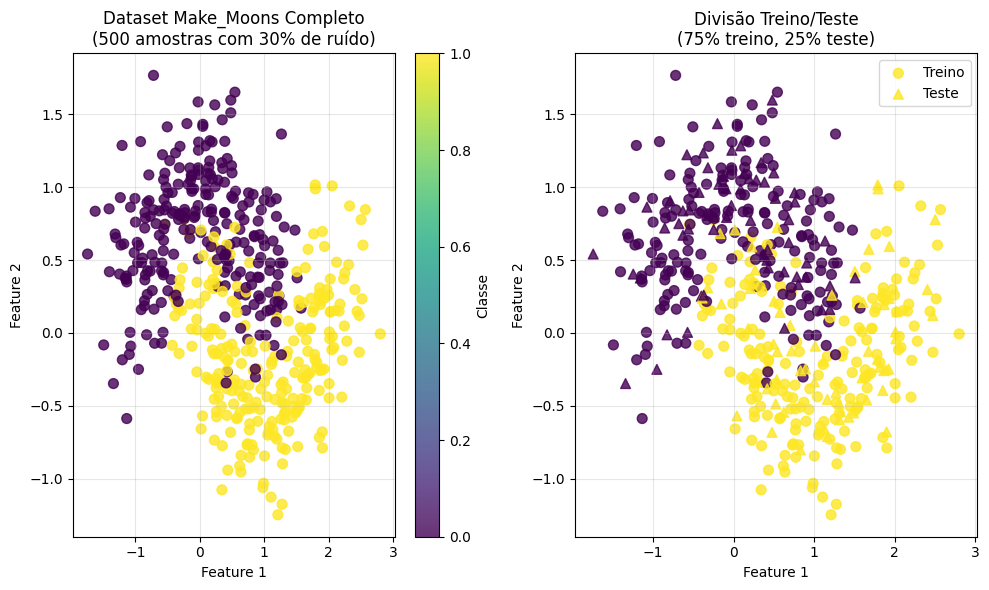

📊 Dataset Info:
• Total de amostras: 500
• Amostras de treino: 375
• Amostras de teste: 125
• Features: 2
• Classes: 2 (valores: [0 1])
• Distribuição de classes: Classe 0: 250, Classe 1: 250


In [ ]:
# Visualizando o dataset make_moons
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Subplot 1: Dataset completo
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8, s=50)
plt.title('Dataset Make_Moons Completo\n(500 amostras com 30% de ruído)', fontsize=12)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Classe')
plt.grid(True, alpha=0.3)

# Subplot 2: Separação treino/teste
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.8, s=50, label='Treino')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8, s=50, marker='^', label='Teste')
plt.title('Divisão Treino/Teste\n(75% treino, 25% teste)', fontsize=12)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Dataset Info:")
print(f"• Total de amostras: {len(X)}")
print(f"• Amostras de treino: {len(X_train)}")
print(f"• Amostras de teste: {len(X_test)}")
print(f"• Features: {X.shape[1]}")
print(f"• Classes: {len(np.unique(y))} (valores: {np.unique(y)})")
print(f"• Distribuição de classes: Classe 0: {sum(y==0)}, Classe 1: {sum(y==1)}")


## 1.1 Implementação Prática - Hard Voting

Vamos implementar um Voting Classifier combinando três algoritmos diferentes:
- **Regressão Logística**: modelo linear simples
- **Random Forest**: ensemble de árvores de decisão  
- **SVM**: modelo de kernel para fronteiras não-lineares

Usaremos o dataset `make_moons` para demonstrar como diferentes modelos podem se complementar.


In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))
    

lr = 0.864
rf = 0.896
svc = 0.896


### Verificando Performance Individual dos Modelos

Agora vamos verificar novamente a performance de cada modelo que compõe nosso ensemble:


O output acima mostra a **acurácia de cada modelo individual** no conjunto de teste:

- **lr (Logistic Regression)**: 86.4% - modelo linear simples
- **rf (Random Forest)**: 89.6% - ensemble de árvores 
- **svc (SVM)**: 89.6% - modelo não-linear com kernel

**Observação importante**: Mesmo que Random Forest e SVM tenham a mesma acurácia (89.6%), eles provavelmente erram em **instâncias diferentes**, o que torna a combinação valiosa para aumentar a robustez.

### Analisando Previsões Individuais

Vamos ver como cada modelo individual prevê para a primeira instância do conjunto de teste:


In [ ]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

### Previsão do Voting Classifier

Agora vamos ver a decisão final do nosso Voting Classifier:


In [ ]:
voting_clf.predict(X_test[:1])

array([1])

### Visualizando Fronteiras de Decisão

Vamos criar uma visualização comparativa das fronteiras de decisão de cada modelo:


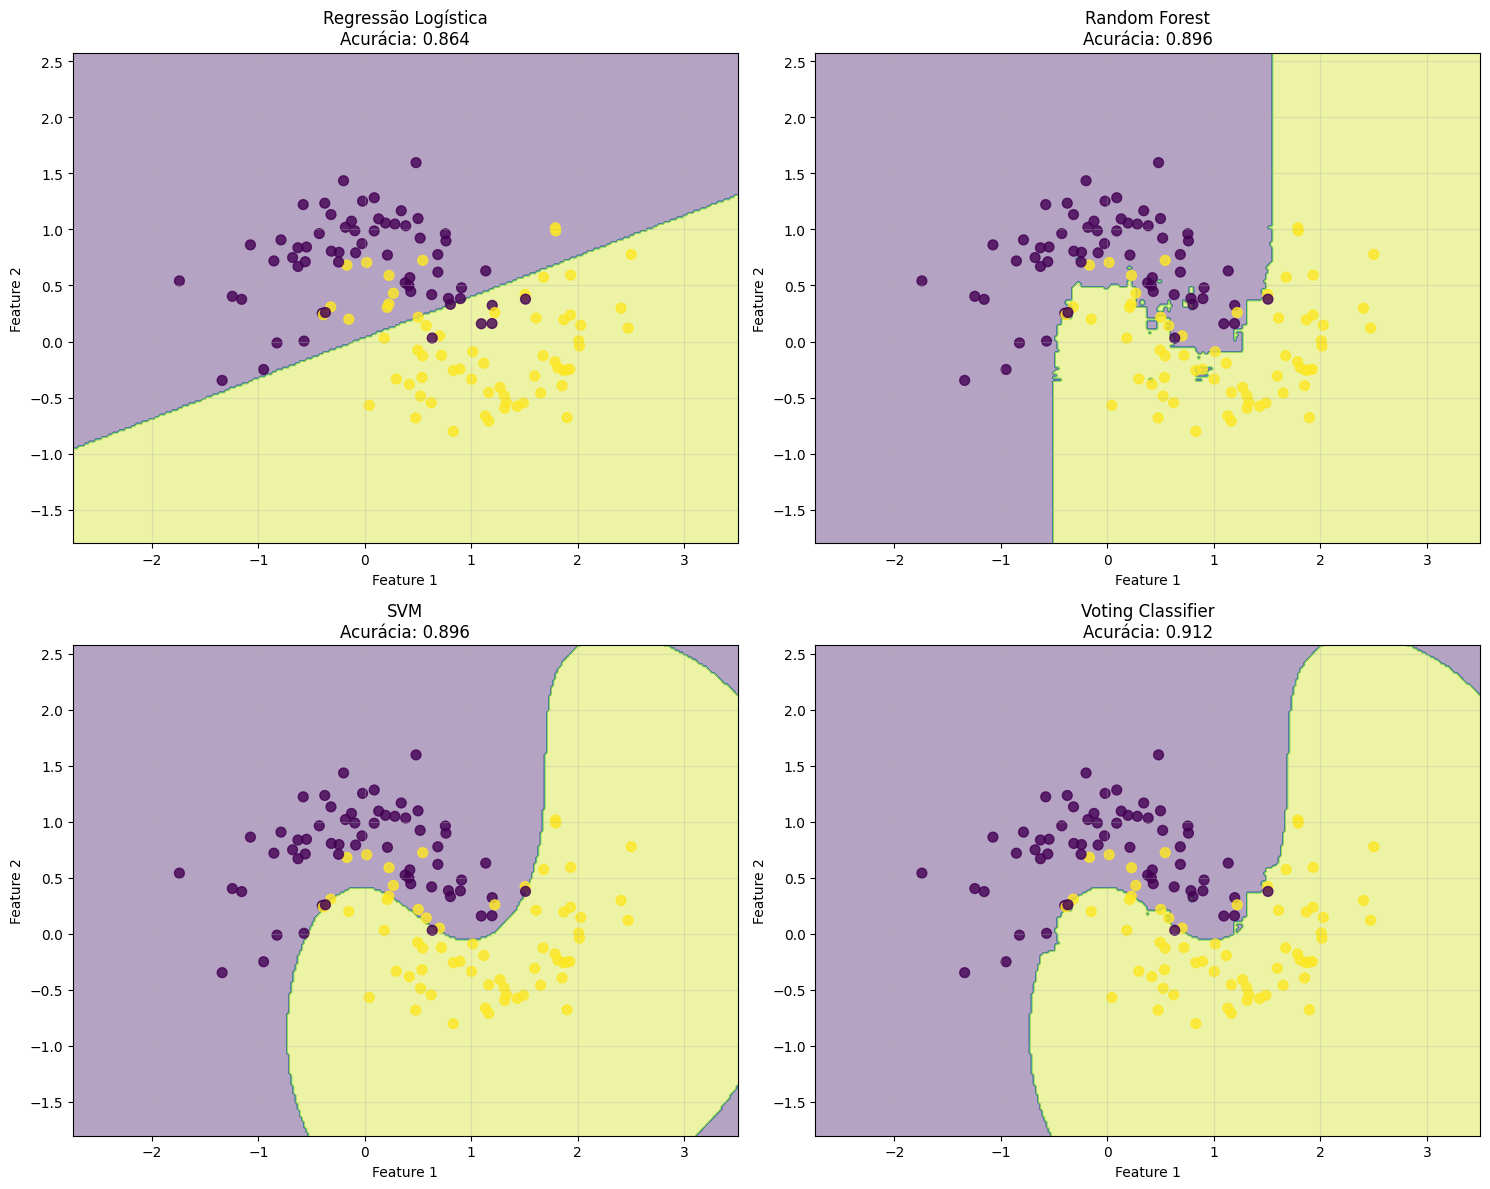

In [ ]:
# Visualizando as fronteiras de decisão dos modelos individuais
def plot_decision_boundary(clf, X, y, title, ax):
    """Função para plotar fronteira de decisão de um classificador"""
    h = 0.02  # passo no mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Fazer predições em todos os pontos do mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotar a fronteira de decisão
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.8, s=50)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

# Criando figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Treinando modelos individuais para visualização
lr_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
rf_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm_clf = SVC(random_state=42).fit(X_train, y_train)

# Plotando cada modelo
plot_decision_boundary(lr_clf, X_test, y_test, 
                      f'Regressão Logística\nAcurácia: {lr_clf.score(X_test, y_test):.3f}', 
                      axes[0, 0])

plot_decision_boundary(rf_clf, X_test, y_test, 
                      f'Random Forest\nAcurácia: {rf_clf.score(X_test, y_test):.3f}', 
                      axes[0, 1])

plot_decision_boundary(svm_clf, X_test, y_test, 
                      f'SVM\nAcurácia: {svm_clf.score(X_test, y_test):.3f}', 
                      axes[1, 0])

plot_decision_boundary(voting_clf, X_test, y_test, 
                      f'Voting Classifier\nAcurácia: {voting_clf.score(X_test, y_test):.3f}', 
                      axes[1, 1])

plt.tight_layout()
plt.show()


In [ ]:
voting_clf.score(X_test, y_test)

0.912

### Configurando Soft Voting

Agora vamos configurar o modelo para usar Soft Voting e comparar a performance:


In [ ]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

# 2. Bagging e Pasting

## 2.1 Conceitos Fundamentais

**Bagging** e **Pasting** usam o mesmo algoritmo múltiplas vezes, mas cada modelo é treinado em subconjuntos diferentes dos dados originais.

### Diferenças principais:

**🎒 Bagging (Bootstrap Aggregating)**:
- **Amostragem com reposição**: Mesma instância pode aparecer múltiplas vezes
- Cada subset contém ~63.2% dos dados únicos originais
- ~37% dos dados ficam "de fora" (Out-of-Bag) e podem ser usados para validação

**📋 Pasting**:
- **Amostragem sem reposição**: Cada instância aparece no máximo uma vez
- Menor variabilidade entre modelos
- Todos os dados são eventualmente utilizados

### Por que funciona?
- Cada modelo vê dados ligeiramente diferentes
- Erros tendem a ser independentes entre modelos
- Quando combinamos previsões, erros se cancelam → modelo mais robusto

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

ModuleNotFoundError: No module named '_posixsubprocess'

# 3. Random Forests

## 3.1 Conceitos e Características

Random Forest é uma das técnicas de ensemble mais populares e eficazes. É essencialmente Bagging aplicado a árvores de decisão, com uma dose extra de aleatoriedade.

### Características Principais:

**Dupla Aleatoriedade**:
1. **Bootstrap dos Dados**: Como no Bagging tradicional
2. **Seleção Aleatória de Features**: Em cada nó, apenas um subconjunto de features é considerado

**Parâmetros Típicos**:
- Para **classificação**: √n features por nó (n = total de features)
- Para **regressão**: n/3 features por nó
- **Profundidade**: Árvores crescem até folhas puras (sem poda)

### Por que Random Forests Funcionam Tão Bem?

1. **Baixa Correlação**: Árvores são muito diferentes entre si
2. **Baixo Viés**: Árvores profundas têm baixo viés
3. **Baixa Variância**: Ensemble reduz a variância individual
4. **Robustez**: Resistente a outliers e ruído

### Implementando Random Forest

Vamos criar um Random Forest para comparar com o Bagging simples:


## 3.2 Implementação Prática

O `RandomForestClassifier` do scikit-learn facilita a implementação:

**Parâmetros Importantes**:
- `n_estimators`: Número de árvores (padrão: 100)
- `max_features`: Features consideradas por split ("sqrt", "log2", int, float)
- `max_depth`: Profundidade máxima (None = sem limite)
- `min_samples_split`: Mínimo de amostras para split (padrão: 2)
- `min_samples_leaf`: Mínimo de amostras por folha (padrão: 1)
- `n_jobs`: Paralelização (-1 = todos os cores)

**Random Forest vs Bagging com Árvores**:
- RF: `max_features` limitado (√n para classificação)
- Bagging: `max_features` = n (todas as features)
- RF geralmente tem melhor performance devido à menor correlação


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                    n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
# Primeiro, vamos treinar um Random Forest específico para o dataset Iris
print("🌸 Treinando Random Forest no dataset Iris para análise de importância...")

# Carregando o dataset Iris (caso não esteja carregado)
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

# Treinando Random Forest especificamente no Iris
rnd_clf_iris = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf_iris.fit(iris.data, iris.target)

print(f"✅ Modelo treinado com {iris.data.shape[1]} features:")
for i, feature in enumerate(iris.data.columns):
    print(f"   {i+1}. {feature}")
print(f"📊 Acurácia no dataset Iris: {rnd_clf_iris.score(iris.data, iris.target):.3f}")
print()


🌸 Treinando Random Forest no dataset Iris para análise de importância...
✅ Modelo treinado com 4 features:
   1. sepal length (cm)
   2. sepal width (cm)
   3. petal length (cm)
   4. petal width (cm)
📊 Acurácia no dataset Iris: 1.000



🌸 Iniciando visualização de importância das features do Iris...
📊 Dataset carregado: (150, 4)
✅ Modelo treinado: 4 features
✅ Importâncias extraídas: 4 valores
✅ Verificação de compatibilidade passou


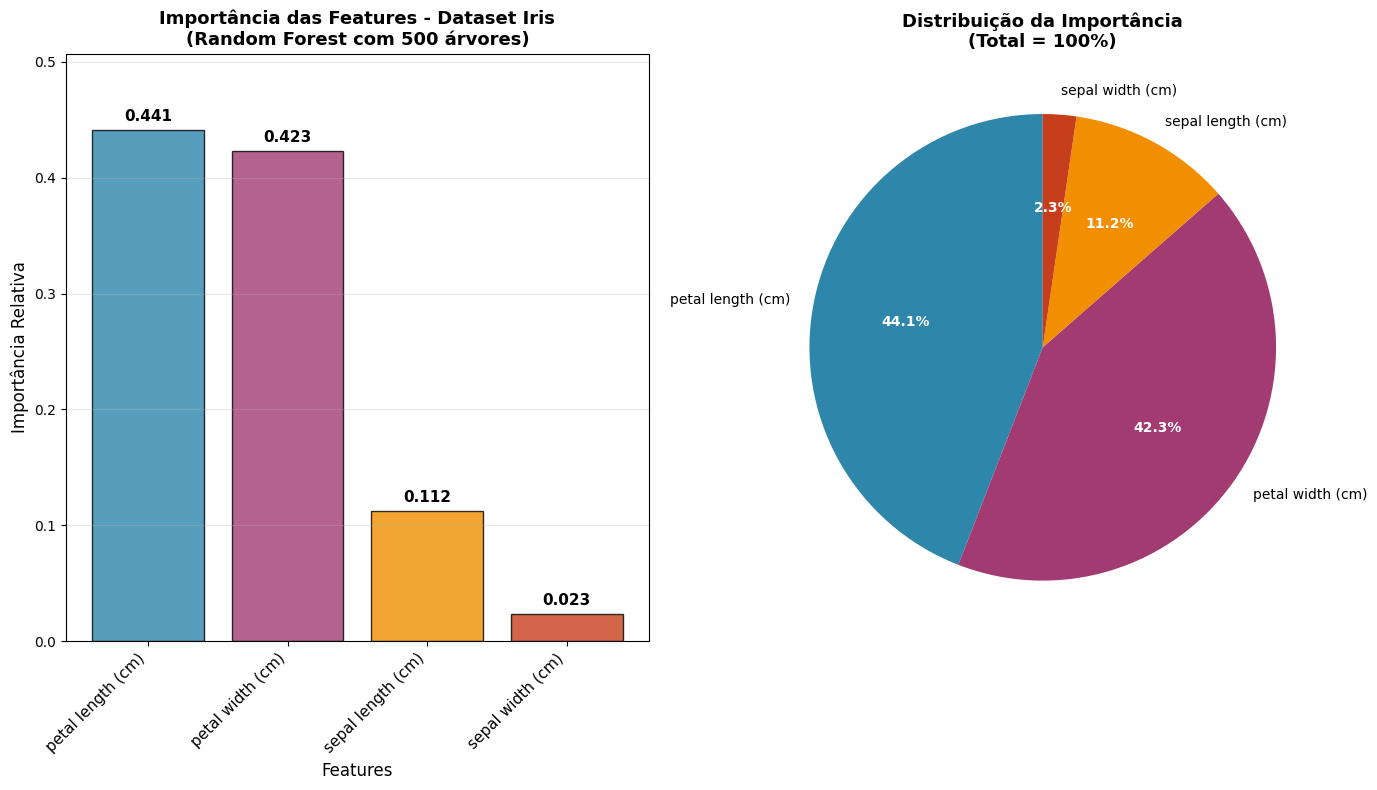


🌸 ANÁLISE DETALHADA DA IMPORTÂNCIA DAS FEATURES
1º lugar: petal length (cm)
   🔸 Importância: 0.4410 (44.1%) ⭐⭐⭐⭐

2º lugar: petal width (cm)
   🔸 Importância: 0.4234 (42.3%) ⭐⭐⭐⭐

3º lugar: sepal length (cm)
   🔸 Importância: 0.1125 (11.2%) ⭐

4º lugar: sepal width (cm)
   🔸 Importância: 0.0231 (2.3%) 

🔍 INSIGHTS PRINCIPAIS:
🌺 Características da PÉTALA: 86.4% da capacidade preditiva
🍃 Características da SÉPALA: 13.6% da capacidade preditiva
📊 Diferença Pétala vs Sépala: 72.9%
✅ As pétalas são mais discriminativas que as sépalas para classificar íris!

📈 Acurácia do modelo: 100.0%
✅ Visualização concluída com sucesso!


In [ ]:
# VERSÃO ROBUSTA: Visualização de Importância de Features - Dataset Iris
print("🌸 Iniciando visualização de importância das features do Iris...")

# Garantindo que temos tudo necessário
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Carregando dataset Iris
iris_dataset = load_iris(as_frame=True)
print(f"📊 Dataset carregado: {iris_dataset.data.shape}")

# Criando modelo Random Forest específico para Iris
rf_iris_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_iris_model.fit(iris_dataset.data, iris_dataset.target)

# Extraindo informações para visualização
feature_names = iris_dataset.data.columns.tolist()
feature_importances = rf_iris_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print(f"✅ Modelo treinado: {len(feature_names)} features")
print(f"✅ Importâncias extraídas: {len(feature_importances)} valores")

# Verificação de compatibilidade
assert len(feature_names) == len(feature_importances), "Incompatibilidade de tamanhos!"
print("✅ Verificação de compatibilidade passou")

# Criando visualização
plt.figure(figsize=(14, 8))

# Subplot 1: Gráfico de barras
plt.subplot(1, 2, 1)
x_positions = range(len(feature_names))
y_values = feature_importances[sorted_indices]
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']  # Cores distintas para 4 features

bars = plt.bar(x_positions, y_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Adicionando valores nas barras
for i, (bar, importance) in enumerate(zip(bars, y_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{importance:.3f}', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

plt.title('Importância das Features - Dataset Iris\n(Random Forest com 500 árvores)', 
          fontsize=13, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importância Relativa', fontsize=12)
plt.xticks(x_positions, [feature_names[i] for i in sorted_indices], 
           rotation=45, ha='right', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, max(y_values) * 1.15)

# Subplot 2: Gráfico de pizza
plt.subplot(1, 2, 2)
labels_pie = [feature_names[i] for i in sorted_indices]
sizes_pie = y_values
colors_pie = colors

wedges, texts, autotexts = plt.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%', 
                                   colors=colors_pie, startangle=90, 
                                   textprops={'fontsize': 10})

# Melhorando a aparência do texto
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribuição da Importância\n(Total = 100%)', 
          fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Análise detalhada
print("\n" + "="*60)
print("🌸 ANÁLISE DETALHADA DA IMPORTÂNCIA DAS FEATURES")
print("="*60)

for i, idx in enumerate(sorted_indices):
    feature_name = feature_names[idx]
    importance = feature_importances[idx]
    percentage = importance * 100
    stars = "⭐" * min(int(percentage / 10), 5)  # Visualização com estrelas
    
    print(f"{i+1}º lugar: {feature_name}")
    print(f"   🔸 Importância: {importance:.4f} ({percentage:.1f}%) {stars}")
    print()

# Insights especiais
petal_importance = feature_importances[2] + feature_importances[3]  # petal length + width
sepal_importance = feature_importances[0] + feature_importances[1]  # sepal length + width

print("🔍 INSIGHTS PRINCIPAIS:")
print(f"🌺 Características da PÉTALA: {petal_importance:.1%} da capacidade preditiva")
print(f"🍃 Características da SÉPALA: {sepal_importance:.1%} da capacidade preditiva")
print(f"📊 Diferença Pétala vs Sépala: {abs(petal_importance - sepal_importance):.1%}")

if petal_importance > sepal_importance:
    print("✅ As pétalas são mais discriminativas que as sépalas para classificar íris!")
else:
    print("✅ As sépalas são mais discriminativas que as pétalas para classificar íris!")

print(f"\n📈 Acurácia do modelo: {rf_iris_model.score(iris_dataset.data, iris_dataset.target):.1%}")
print("✅ Visualização concluída com sucesso!")


# 4. Boosting: Aprendendo com os Erros

## O que é Boosting?

Boosting é uma família de algoritmos de ensemble que segue uma estratégia única: treinar modelos sequencialmente, onde cada novo modelo tenta corrigir os erros dos modelos anteriores. É como ter uma equipe onde cada membro se especializa em resolver os problemas que os outros ainda não conseguiram resolver.

### Importância das Features - Versão Simples

Uma versão mais simples para verificar a importância das features no dataset Iris:


## 4.2 AdaBoost (Adaptive Boosting)

AdaBoost foi o primeiro algoritmo de boosting bem-sucedido e ainda é amplamente usado.

### Como Funciona:

1. **Inicialização**: Todos os exemplos têm peso igual
2. **Treinamento**: Treina um modelo "fraco" (ex: decision stump)
3. **Avaliação**: Calcula o erro ponderado do modelo
4. **Peso do Modelo**: Modelos com menor erro recebem maior peso (α)
5. **Atualização dos Exemplos**: 
   - Aumenta peso dos exemplos mal classificados
   - Diminui peso dos exemplos bem classificados
6. **Repetição**: Volta ao passo 2 até atingir número desejado de modelos

### Predição Final:
- **Classificação**: Votação ponderada pelos pesos α
- **Cada modelo vota** com peso proporcional à sua qualidade

### Vantagens:
- Simples de entender e implementar
- Funciona bem com modelos fracos
- Menos propenso a overfitting que outros métodos
- Pode atingir qualquer precisão desejada (teoricamente)

### Desvantagens:
- Sensível a outliers e ruído
- Performance pode degradar com dados muito ruidosos
- Pode ser lento com datasets grandes


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)

for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)



0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=30,
                        learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,30
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


## 4.3 Gradient Boosting - Implementação Manual

Vamos implementar manualmente o conceito de Gradient Boosting para entender como funciona:


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100) # y = 3x² + Gaussian noise
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,43
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# 5. Stacking - Meta-Aprendizado

## 5.1 Implementação de Stacking Classifier

Stacking é uma técnica avançada onde um "meta-modelo" aprende a combinar as previsões de vários modelos base:


In [ ]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,44
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
# Importando o StackingClassifier do scikit-learn
from sklearn.ensemble import StackingClassifier

# Criando o Stacking Classifier
# Modelos base (nível 0):
# 1. Regressão Logística: modelo linear simples
# 2. Random Forest: ensemble de árvores
# 3. SVM: modelo de kernel com probabilidades
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),    # Modelo linear
        ('rf', RandomForestClassifier(random_state=42)), # Ensemble de árvores
        ('svc', SVC(probability=True, random_state=42))  # SVM com probabilidades
    ],
    # Meta-modelo (nível 1): Random Forest
    # Este modelo aprenderá como combinar as previsões dos modelos base
    final_estimator=RandomForestClassifier(random_state=43),
    
    # Usando 5-fold cross-validation para gerar as meta-features
    # Isso evita vazamento de dados no treinamento
    cv=5
)

# Treinando o ensemble completo
# 1. Treina os modelos base usando cross-validation
# 2. Gera meta-features (previsões dos modelos base)
# 3. Treina o meta-modelo nas meta-features
stacking_clf.fit(X_train, y_train)


,estimators,"[('lr', ...), ('rf', ...), ...]"
,final_estimator,RandomForestC...ndom_state=43)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [ ]:
# Comparando a performance de todos os ensembles
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier  # Importando StackingClassifier

# Garantindo que todos os modelos estejam treinados com o dataset correto (make_moons)
print("Treinando todos os modelos para comparação no dataset make_moons...")

# Modelos individuais
lr_model = LogisticRegression(random_state=42).fit(X_train, y_train)
rf_individual = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm_model = SVC(random_state=42).fit(X_train, y_train)

# Modelos de ensemble - retreinando todos para garantir consistência
print("Retreinando modelos de ensemble...")

# Voting Classifier (já treinado mas vamos confirmar)
voting_clf_final = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf_final.fit(X_train, y_train)

# Bagging Classifier
bag_clf_final = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  max_samples=100, n_jobs=-1, random_state=42)
bag_clf_final.fit(X_train, y_train)

# Random Forest Ensemble (retreinando com dataset correto)
rnd_clf_final = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                       n_jobs=-1, random_state=42)
rnd_clf_final.fit(X_train, y_train)

# AdaBoost (retreinando para garantir)
ada_clf_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42)
ada_clf_final.fit(X_train, y_train)

# Stacking Classifier (retreinando para garantir)
stacking_clf_final = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5
)
stacking_clf_final.fit(X_train, y_train)

print("\n=== COMPARAÇÃO DE PERFORMANCE ===")
print(f"Regressão Logística (individual): {lr_model.score(X_test, y_test):.3f}")
print(f"Random Forest (individual):       {rf_individual.score(X_test, y_test):.3f}")
print(f"SVM (individual):                 {svm_model.score(X_test, y_test):.3f}")
print()
print("=== MÉTODOS DE ENSEMBLE ===")
print(f"Voting Classifier (Hard):         {voting_clf_final.score(X_test, y_test):.3f}")
print(f"Bagging Classifier:               {bag_clf_final.score(X_test, y_test):.3f}")
print(f"Random Forest Ensemble:           {rnd_clf_final.score(X_test, y_test):.3f}")
print(f"AdaBoost:                         {ada_clf_final.score(X_test, y_test):.3f}")
print(f"Stacking Classifier:              {stacking_clf_final.score(X_test, y_test):.3f}")


Treinando todos os modelos para comparação no dataset make_moons...
Retreinando modelos de ensemble...


ModuleNotFoundError: No module named '_posixsubprocess'

In [ ]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

,loss,'squared_error'
,learning_rate,1.0
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [ ]:
gbrt_best = GradientBoostingRegressor(max_depth=2, learning_rate=0.05, n_estimators=500,
                                    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [ ]:
gbrt_best.n_estimators_

92

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
estimators=[('lr', LogisticRegression(random_state=42)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
],
final_estimator=RandomForestClassifier(random_state=43),
cv=5 # number of cross-validation folds
)

stacking_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,final_estimator,RandomForestC...ndom_state=43)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


# Comparação Final de Performance

Vamos comparar a performance de todos os métodos implementados:


In [ ]:
# Importando o StackingClassifier para esta célula
from sklearn.ensemble import StackingClassifier

# Visualização final: Comparação de todos os métodos
plt.figure(figsize=(16, 8))

# Executando o código de comparação para capturar os resultados
print("Treinando todos os modelos para comparação no dataset make_moons...")

# Modelos individuais
lr_model = LogisticRegression(random_state=42).fit(X_train, y_train)
rf_individual = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm_model = SVC(random_state=42).fit(X_train, y_train)

# Modelos de ensemble
voting_clf_final = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
).fit(X_train, y_train)

bag_clf_final = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                                  max_samples=100, n_jobs=-1, random_state=42).fit(X_train, y_train)

rnd_clf_final = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                       n_jobs=-1, random_state=42).fit(X_train, y_train)

ada_clf_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42).fit(X_train, y_train)

stacking_clf_final = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5
).fit(X_train, y_train)

# Coletando os scores
models = [lr_model, rf_individual, svm_model, voting_clf_final, 
          bag_clf_final, rnd_clf_final, ada_clf_final, stacking_clf_final]
model_names = ['Logistic\nRegression', 'Random Forest\n(Individual)', 'SVM', 
               'Voting\nClassifier', 'Bagging\nClassifier', 'Random Forest\n(Ensemble)', 
               'AdaBoost', 'Stacking\nClassifier']
scores = [model.score(X_test, y_test) for model in models]

# Criando o gráfico de barras
plt.subplot(1, 2, 1)
colors = ['lightcoral', 'lightcoral', 'lightcoral', 'lightblue', 'lightblue', 
          'lightgreen', 'lightgreen', 'gold']
bars = plt.bar(range(len(model_names)), scores, color=colors, alpha=0.8)

# Adicionando valores nas barras
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Comparação de Performance\nDataset Make_Moons', fontsize=14, fontweight='bold')
plt.xlabel('Métodos')
plt.ylabel('Acurácia')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3, axis='y')

# Adicionando linha de separação entre individuais e ensembles
plt.axvline(x=2.5, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.text(1, 0.95, 'Modelos\nIndividuais', ha='center', fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
plt.text(5.5, 0.95, 'Métodos de\nEnsemble', ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Subplot 2: Gráfico de pizza mostrando distribuição
plt.subplot(1, 2, 2)
ensemble_scores = scores[3:]  # Apenas ensembles
ensemble_names = model_names[3:]
colors_pie = ['lightblue', 'lightblue', 'lightgreen', 'lightgreen', 'gold']

plt.pie(ensemble_scores, labels=ensemble_names, autopct='%1.3f', 
        colors=colors_pie, startangle=90)
plt.title('Performance dos Ensembles\n(Valores de Acurácia)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Análise dos resultados
print("\n" + "="*50)
print("📊 ANÁLISE COMPARATIVA FINAL")
print("="*50)

best_individual = max(scores[:3])
best_ensemble = max(scores[3:])
best_overall_idx = scores.index(max(scores))

print(f"🥇 Melhor modelo individual: {best_individual:.3f}")
print(f"🏆 Melhor ensemble: {best_ensemble:.3f}")
print(f"🌟 Melhor modelo geral: {model_names[best_overall_idx]} ({scores[best_overall_idx]:.3f})")
print(f"📈 Melhoria do ensemble: {best_ensemble - best_individual:.3f} ({((best_ensemble/best_individual - 1)*100):.1f}%)")

print("\n🎯 Insights:")
if best_ensemble > best_individual:
    print("✅ Os ensembles superaram os modelos individuais!")
    print("✅ Validamos o conceito da 'sabedoria das multidões'")
else:
    print("⚠️  Neste caso específico, ensembles não melhoraram significativamente")
    
improvement = best_ensemble - best_individual
if improvement > 0.03:
    print("🚀 Melhoria significativa (>3%)")
elif improvement > 0.01:
    print("📊 Melhoria moderada (1-3%)")
else:
    print("📉 Melhoria marginal (<1%)")

Treinando todos os modelos para comparação no dataset make_moons...


ModuleNotFoundError: No module named '_posixsubprocess'

<Figure size 1600x800 with 0 Axes>

![end](NCIA_Images\end.png)